In [2]:
from sklearn.neighbors import BallTree
import pandas as pd
import numpy as np

In [3]:
ls8 = pd.read_csv('./LS8.csv')

In [4]:
ls8

,name,path,row,lat,lon,lat_UL,lon_UL,lat_UR,lon_UR,lat_LL,lon_LL,lat_LR,lon_LR
0,16_122,16.0,122.0,-81.844418,176.043772,-80.929,-178.785,-82.680,-177.567,-80.929,170.873,-82.680,169.654
1,15_122,15.0,122.0,-81.844418,177.588836,-80.929,-177.240,-82.680,-176.021,-80.929,172.418,-82.680,171.199
2,14_122,14.0,122.0,-81.844418,179.133901,-80.929,-175.695,-82.680,-174.476,-80.929,173.963,-82.680,172.744
3,13_122,13.0,122.0,-81.844418,-179.321040,-80.929,-174.150,-82.680,-172.931,-80.929,175.508,-82.680,174.289
4,12_122,12.0,122.0,-81.844418,-177.775970,-80.929,-172.605,-82.680,-171.386,-80.929,177.053,-82.680,175.834
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28552,124_247,124.0,247.0,81.718750,166.653724,82.696,171.759,80.942,172.726,82.387,159.443,80.691,162.631
28553,123_247,123.0,247.0,81.718750,168.198788,82.696,173.304,80.942,174.271,82.387,160.988,80.691,164.176
28554,122_247,122.0,247.0,81.718750,169.743853,82.696,174.850,80.942,175.816,82.387,162.533,80.691,165.721
28555,121_247,121.0,247.0,81.718750,171.288917,82.696,176.395,80.942,177.361,82.387,164.079,80.691,167.266


<AxesSubplot:>

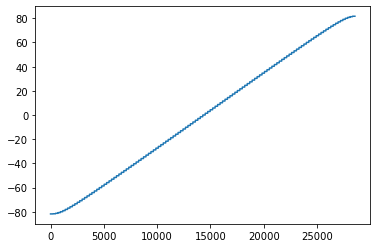

In [5]:
ls8.lat.plot()

Simple case: Closest LS8 Scene
----------------------------------------------

Remember, lat/lon convention is opposite the expected ordering for spatial index structures, which are x/y

In [7]:
LS_rad = np.vstack((ls8.lon.values,ls8.lat.values)).T
LS_rad

array([[176.043772, -81.844418],
       [177.588836, -81.844418],
       [179.133901, -81.844418],
       ...,
       [169.743853,  81.71875 ],
       [171.288917,  81.71875 ],
       [172.833982,  81.71875 ]])

In [8]:
LS_rad *= np.pi/180

In [9]:
LSBall = BallTree(LS_rad,metric='haversine')

In [10]:
# not tested for arrays yet...
def lquery(lat,lon):
    q = np.array([[lon, lat]])
    q *= np.pi/180.
    idx = LSBall.query(q.reshape(1,-1),k=1,return_distance=False,breadth_first=True)
    path = int(ls8.path.iloc[idx.flatten()].values)
    row = int(ls8.row.iloc[idx.flatten()].values)
    return path, row

In [11]:
lquery(73.5, 120)

(135, 9)